# Protein Folding Problem
 We can solve the protein folding problem based on some steps:
 
 i.  ProteinFoldingProblem function (Convert a protein into qubits)<br>
 ii. VQE algorithm (finding the lowest energy configuration)

In [1]:
from qiskit_nature.problems.sampling.protein_folding.peptide.peptide import Peptide
from qiskit_nature.problems.sampling.protein_folding.interactions.miyazawa_jernigan_interaction import MiyazawaJerniganInteraction
from qiskit_nature.problems.sampling.protein_folding.penalty_parameters import PenaltyParameters
from qiskit_nature.problems.sampling.protein_folding.protein_folding_problem import ProteinFoldingProblem
from qiskit.circuit.library import RealAmplitudes
from qiskit.algorithms.optimizers import COBYLA
from qiskit.utils import QuantumInstance
from qiskit import execute, Aer
from qiskit.opflow import PauliExpectation, CVaRExpectation
from qiskit.algorithms import VQE

##  i.  ProteinFoldingProblem function

We can define a protein folding function to solve this problem based on:
1. Definition of a protein
2. The interaction method
3. Penalty terms


In [2]:
### 1. Defining a protein

main_chain = "APRLRFY" #Alanine,Proline,Arginine,Leucine,Arginine,Phenylalanine,Tyrosine / 7 amino acids
side_chains = [""] * 7 # seven empty side chains = no side chains 
protein1 = Peptide(main_chain, side_chains)

### 2. The interaction method
miyazawa_jernigan = MiyazawaJerniganInteraction()

### 3. Penalty terms
penalty_terms = PenaltyParameters(10,10,10) #(penalty_chiral, penalty_back, penalty_1)

### using ProteinFoldingProblem Function
protein_folding_1 = ProteinFoldingProblem(protein1, miyazawa_jernigan, penalty_terms)
qubit_operations_1 = protein_folding_1.qubit_op()
print(qubit_operations_1)

1613.5895000000003 * IIIIIIIII
- 701.802 * ZIIIIIIII
- 904.2875 * IZIIIIIII
+ 192.5 * IIZIIIIII
- 200.0 * ZIZIIIIII
+ 7.5 * IZZIIIIII
+ 105.0 * IIIZIIIII
- 105.0 * ZIIZIIIII
+ 95.0 * IIZZIIIII
- 100.0 * ZIZZIIIII
+ 5.0 * IZZZIIIII
- 497.5 * IIIIZIIII
+ 195.0 * ZIIIZIIII
+ 302.5 * IZIIZIIII
- 95.0 * IIZIZIIII
+ 100.0 * ZIZIZIIII
- 2.5 * IZZIZIIII
- 100.0 * IIIIIZIII
+ 102.5 * ZIIIIZIII
- 2.5 * IZIIIZIII
- 95.0 * IIIZIZIII
+ 100.0 * ZIIZIZIII
- 2.5 * IZIZIZIII
- 300.0 * IIIIZZIII
+ 97.5 * ZIIIZZIII
+ 202.5 * IZIIZZIII
- 95.0 * IIZZZZIII
+ 100.0 * ZIZZZZIII
- 2.5 * IZZZZZIII
+ 487.5 * IIIIIIZII
- 195.0 * ZIIIIIZII
- 295.0 * IZIIIIZII
+ 97.5 * IIZIIIZII
- 100.0 * ZIZIIIZII
+ 2.5 * IZZIIIZII
- 195.0 * IIIIZIZII
+ 97.5 * ZIIIZIZII
+ 100.0 * IZIIZIZII
+ 100.0 * IIIIIIIZI
- 102.5 * ZIIIIIIZI
+ 2.5 * IZIIIIIZI
+ 97.5 * IIIZIIIZI
- 100.0 * ZIIZIIIZI
+ 2.5 * IZIZIIIZI
- 195.0 * IIIIIZIZI
+ 97.5 * ZIIIIZIZI
+ 100.0 * IZIIIZIZI
+ 295.0 * IIIIIIZZI
- 97.5 * ZIIIIIZZI
- 197.5 * IZIIIIZZI
+ 97.5 * IIZ

## ii. VQE with CVaR expectation

We can use VQE algorithm to solve the problem. First, we should define these parts:

1. ansatz
2. optimizer
3. backend

In [3]:
### 1. ansatz
ansatz = RealAmplitudes(reps=1)

### 2. optimizer
optimizer = COBYLA(maxiter=50)

### 3. backend
backend = "aer_simulator"
backend = QuantumInstance(
    Aer.get_backend(backend),
    shots=1000,
)

### callback function
counts = []
values = []

def callback_function(eval_count, parameters, mean, std):
    counts.append(eval_count)
    values.append(mean)
    
    
### expectation
cvar_exp = CVaRExpectation(0.1, PauliExpectation())

### VQE using CVaR
vqe = VQE(
    expectation=cvar_exp,
    optimizer=optimizer,
    ansatz=ansatz,
    quantum_instance=backend,
    callback=callback_function,
)

result = vqe.compute_minimum_eigenvalue(qubit_operations_1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 50,
    'eigenstate': {   '000010011': 0.05477225575051661,
                      '000011101': 0.03162277660168379,
                      '000100010': 0.11832159566199232,
                      '000100011': 0.21447610589527216,
                      '000100100': 0.03162277660168379,
                      '000100101': 0.14491376746189438,
                      '000100110': 0.03162277660168379,
                      '000100111': 0.044721359549995794,
                      '000101010': 0.044721359549995794,
                      '000101011': 0.05477225575051661,
                      '000101101': 0.17029386365926402,
                      '000101110': 0.03162277660168379,
                      '000110010': 0.13784048752090222,
                      '000110011': 0.2345207879911715,
                      '000110100': 0.03162277660168379,
                      '000110101': 0.1341640786499874,
                      '000110111': 

### Plot the results

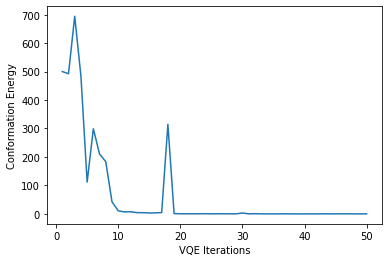

In [4]:
import matplotlib.pyplot as plt

figure = plt.figure()

plt.plot(counts, values)
plt.ylabel("Conformation Energy")
plt.xlabel("VQE Iterations")

plt.show()